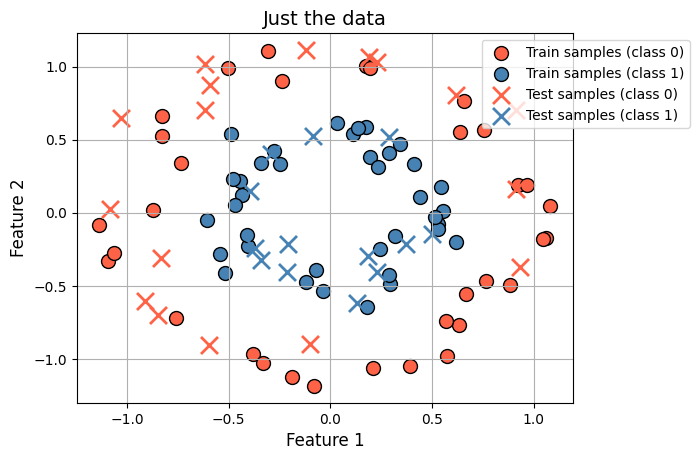

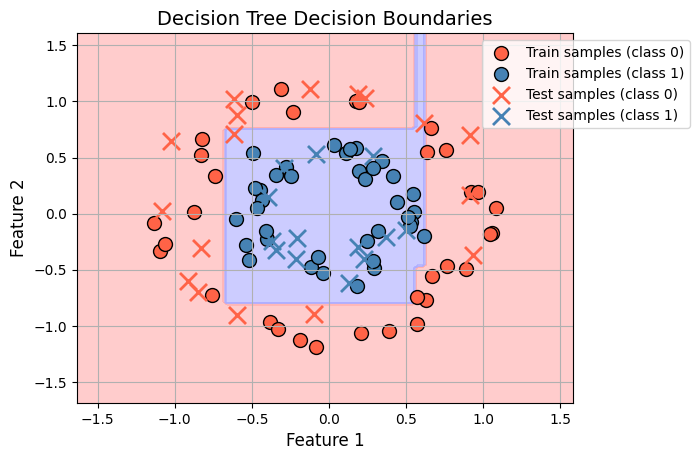

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

def plot_data(X, y, X_test=None, y_test=None):
    """
    Plot a 2D dataset with classes represented by different colors and optional test samples.

    Parameters:
    - X: The feature set (training data) of shape (N_samples, 2)
    - y: The target labels for the training data (binary class labels)
    - X_test: (optional) The feature set for the test samples (same shape as X)
    - y_test: (optional) The target labels for the test data
    """
    cmap = ListedColormap(["#FF6347", "#4682B4"])  # Tomato for class 0, SteelBlue for class 1
    
    # Plot the training points
    neg_idx = y==0
    X_neg, X_pos = X[neg_idx], X[~neg_idx]
    plt.scatter(X_neg[:, 0], X_neg[:, 1], c="#FF6347", marker="o", edgecolors="k", label="Train samples (class 0)", s=100)
    plt.scatter(X_pos[:, 0], X_pos[:, 1], c="#4682B4", marker="o", edgecolors="k", label="Train samples (class 1)", s=100)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, marker="o", edgecolors="k", label="Train samples", s=100)
    
    # Plot test data if provided with different symbol
    if X_test is not None and y_test is not None:
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, marker="x", label="Test samples", s=150, linewidths=2)

    plt.title("Dataset with Train and Test Samples", fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_2d_data(X, y, X_test=None, y_test=None, *, model=None, title="Model Decision Boundaries"):
    """
    Plot the decision boundaries of a classifier along with the dataset points.

    Parameters:
    - X: The feature set (training data) of shape (N_samples, 2)
    - y: The target labels for the training data (binary class labels)
    - model: A trained classifier model
    - X_test: (optional) The feature set for the test samples (same shape as X)
    - y_test: (optional) The target labels for the test data
    - title: Title of the plot
    """
    if model is not None:
        # Define the plot limits
        h = .02  # Step size in the mesh
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    
        # Predict the class for each point in the mesh
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
        DecisionBoundaryDisplay.from_estimator(
            model, X, response_method="predict", cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]), alpha=0.6, eps=0.5
        )
    else:
        plt.figure()

    cmap = ListedColormap(["#FF6347", "#4682B4"])  # Tomato for class 0, SteelBlue for class 1
    neg_idx = y==0
    X_neg, X_pos = X[neg_idx], X[~neg_idx]
    plt.scatter(X_neg[:, 0], X_neg[:, 1], c="#FF6347", marker="o", edgecolors="k", label="Train samples (class 0)", s=100)
    plt.scatter(X_pos[:, 0], X_pos[:, 1], c="#4682B4", marker="o", edgecolors="k", label="Train samples (class 1)", s=100)

    # Plot test data if provided with different symbol
    if X_test is not None and y_test is not None:
        neg_idx = y_test==0
        X_neg, X_pos = X_test[neg_idx], X_test[~neg_idx]
        plt.scatter(X_neg[:, 0], X_neg[:, 1], c="#FF6347", marker="x", label="Test samples (class 0)", s=150, linewidths=2)
        plt.scatter(X_pos[:, 0], X_pos[:, 1], c="#4682B4", marker="x", label="Test samples (class 1)", s=150, linewidths=2)

    plt.title(title, fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Generate a dataset (make_moons or make_circles)
    X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)  # or make_moons(n_samples=100, noise=0.1)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Plot the dataset
    plot_2d_data(X_train, y_train, X_test, y_test, title="Just the data")

    # Train a model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Plot the decision boundaries
    plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Tree Decision Boundaries")

In [2]:
from sklearn.tree import plot_tree

def visualize_decision_tree(model, save_path=None):
    plt.figure(figsize=(8, 10))
    plot_tree(
        model,
        filled=True,
        feature_names=["feature 1", "feature2"],
        class_names=['0', '1'],
        rounded=True,
        #fontsize=40
    )
    if save_path:
        plt.savefig(save_path)
    plt.show()

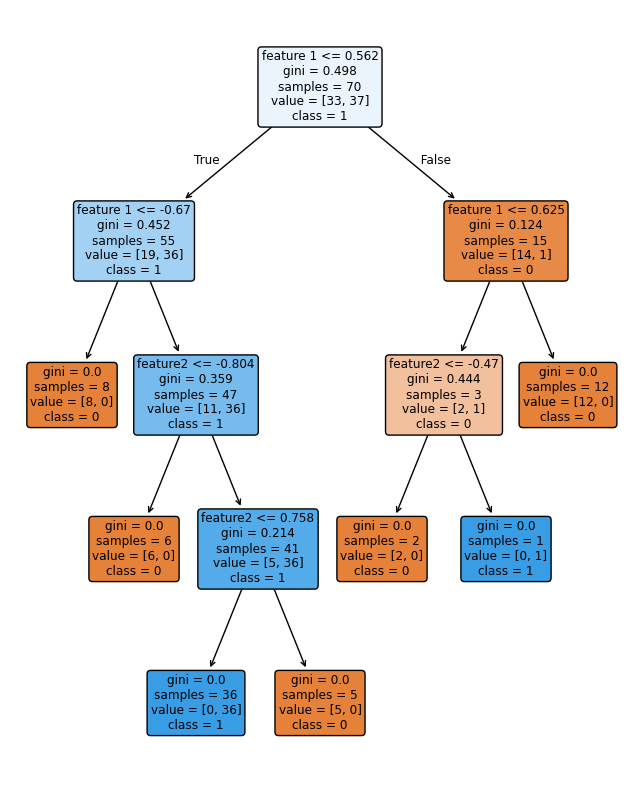

In [3]:
visualize_decision_tree(model)